In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Define the path to your CSV file using raw string
file_path = r"C:\Users\pearl\OneDrive\Desktop\GOV OB Record History May 2024.csv"

# Step 1: Read the CSV file without specifying dtype
df = pd.read_csv(file_path, low_memory=False)

# Step 2: Clean the 'Queue' column by removing commas
df['Queue'] = df['Queue'].str.replace(',', '')

# Step 3: Convert the 'Queue' column to numeric
df['Queue'] = pd.to_numeric(df['Queue'], errors='coerce')

# Handle NaN values in the 'Queue' column
df['Queue'].fillna(0, inplace=True)

# Display the first few rows of the dataframe to confirm the changes
print(df.head())

# Display information about the dataframe to confirm data types
print(df.info())

# Step 4: Save the cleaned dataframe to a new CSV file using raw string
output_file_path = r"C:\Users\pearl\OneDrive\Desktop\GOV OB Record History May 2024_cleaned.csv"
df.to_csv(output_file_path, index=False)

          Timestamp        Campaign Call Type                Source  \
0  01/05/2024 08:01  FL_RES_GOV_IVM  Outbound  RES_GOV_IVM_3004.csv   
1  01/05/2024 08:02  FL_RES_GOV_IVM  Outbound  RES_GOV_IVM_3004.csv   
2  01/05/2024 08:02  FL_RES_GOV_IVM  Outbound  RES_GOV_IVM_3004.csv   
3  01/05/2024 08:03  FL_RES_GOV_IVM  Outbound  RES_GOV_IVM_3004.csv   
4  01/05/2024 08:03  FL_RES_GOV_IVM  Outbound  RES_GOV_IVM_3004.csv   

         Agent Agent Full Name Agent Alt Name Dialler result  \
0  Robot Agent             NaN            NaN      Connected   
1  Robot Agent             NaN            NaN      Connected   
2          NaN             NaN            NaN      No Answer   
3          NaN             NaN            NaN      No Answer   
4          NaN             NaN            NaN      No Answer   

              Agent result Ended by agent?  ...  PreviousCallCount  Calls  \
0  Voiceblast Message Left         Checked  ...                0.0      1   
1  Voiceblast Message Left       U

In [9]:
file_path = r"C:\Users\pearl\OneDrive\Desktop\GOV OB Record History May 2024.csv"
df = pd.read_csv(file_path)


C:\Users\pearl\AppData\Local\Temp\ipykernel_31004\4264052046.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [10]:
# Group by 'Hour of Call'
hourly_analysis = df.groupby('Hour of Call').agg({
    'RPC': ['mean', 'sum'],
    'Success': ['mean', 'sum']
}).reset_index()

# Flatten column names
hourly_analysis.columns = ['Hour of Call', 'RPC_mean', 'RPC_sum', 'Success_mean', 'Success_sum']

# Display the analysis
print(hourly_analysis)


    Hour of Call  RPC_mean  RPC_sum  Success_mean  Success_sum
0              8  0.105725      844      0.015784          126
1              9  0.139766     1841      0.020878          275
2             10  0.149021     1644      0.023115          255
3             11  0.168443     1897      0.026905          303
4             12  0.198291     1764      0.026754          238
5             13  0.226936     1744      0.029148          224
6             14  0.212412     1482      0.027232          190
7             15  0.248067     1797      0.028851          209
8             16  0.235703     1492      0.027962          177
9             17  0.197815      996      0.022443          113
10            18  0.076455      176      0.016507           38
11            19  0.068894       99      0.025052           36
12            20  0.000000        0      0.000000            0


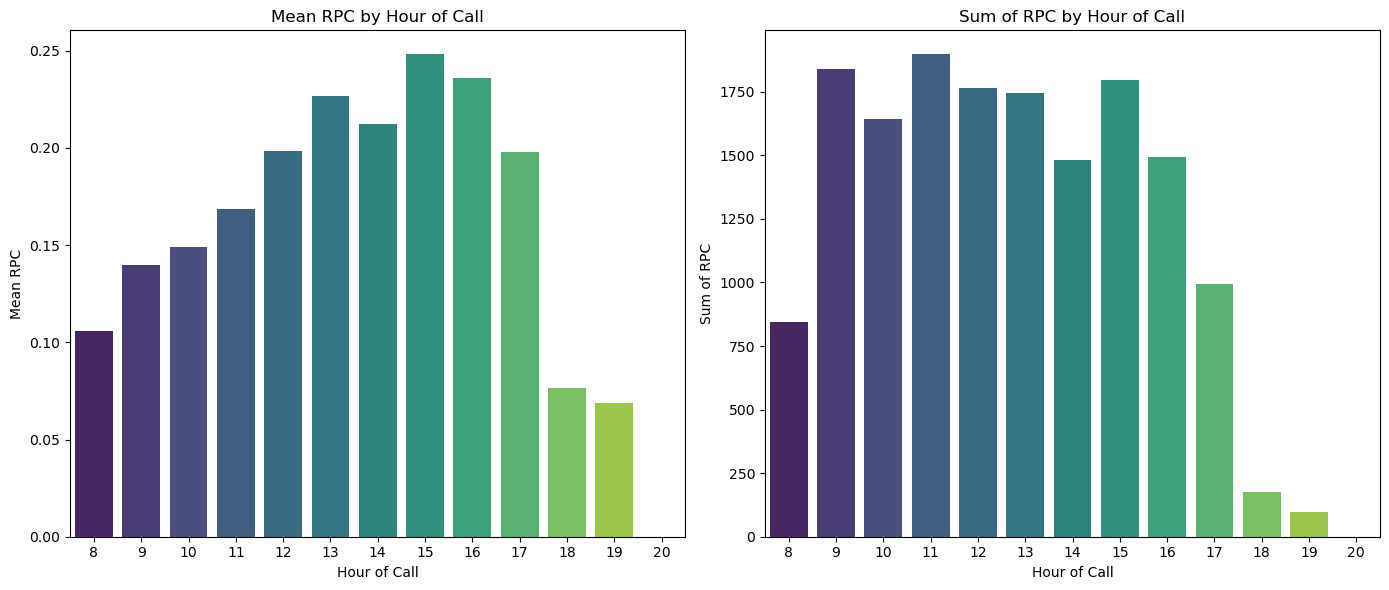

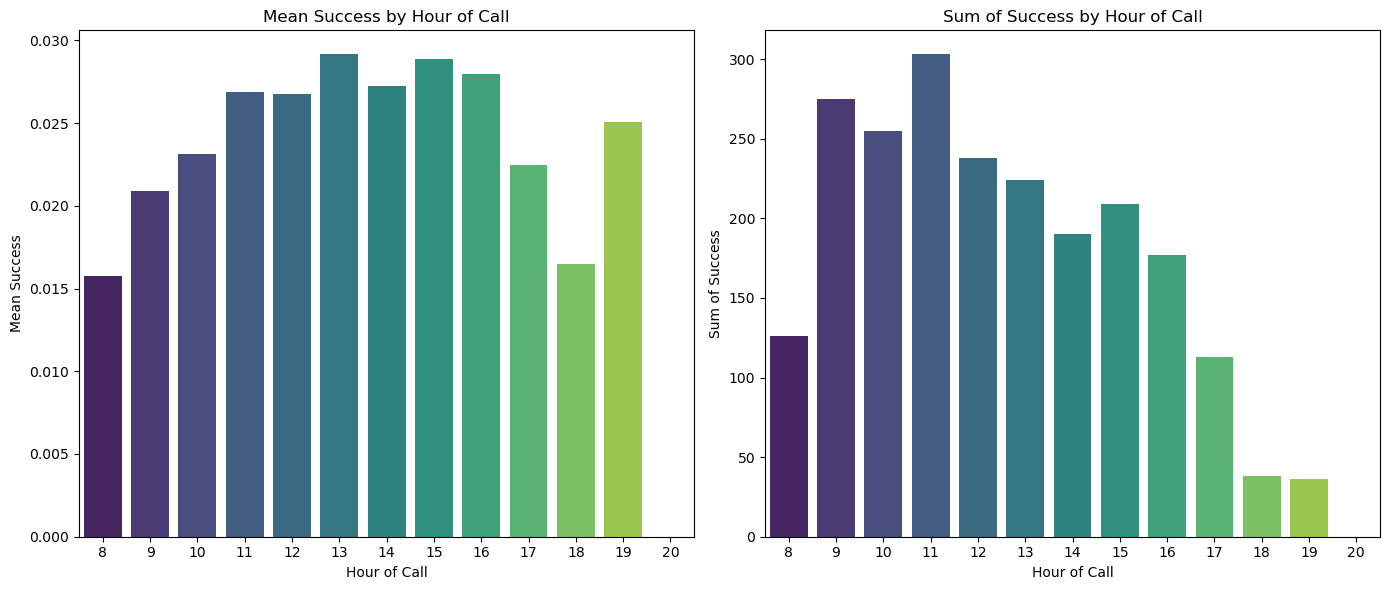

In [11]:
plt.figure(figsize=(14, 6))

# RPC mean and sum
plt.subplot(1, 2, 1)
sns.barplot(x='Hour of Call', y='RPC_mean', data=hourly_analysis, palette='viridis')
plt.title('Mean RPC by Hour of Call')
plt.xlabel('Hour of Call')
plt.ylabel('Mean RPC')

plt.subplot(1, 2, 2)
sns.barplot(x='Hour of Call', y='RPC_sum', data=hourly_analysis, palette='viridis')
plt.title('Sum of RPC by Hour of Call')
plt.xlabel('Hour of Call')
plt.ylabel('Sum of RPC')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

# Success mean and sum
plt.subplot(1, 2, 1)
sns.barplot(x='Hour of Call', y='Success_mean', data=hourly_analysis, palette='viridis')
plt.title('Mean Success by Hour of Call')
plt.xlabel('Hour of Call')
plt.ylabel('Mean Success')

plt.subplot(1, 2, 2)
sns.barplot(x='Hour of Call', y='Success_sum', data=hourly_analysis, palette='viridis')
plt.title('Sum of Success by Hour of Call')
plt.xlabel('Hour of Call')
plt.ylabel('Sum of Success')

plt.tight_layout()
plt.show()


In [12]:
correlation_matrix = df[['RPC', 'Success', 'Ring', 'Balance', 'Hour of Call']].corr()
print(correlation_matrix)


                   RPC   Success      Ring   Balance  Hour of Call
RPC           1.000000  0.300591 -0.126951  0.030699      0.063737
Success       0.300591  1.000000 -0.043423 -0.004008      0.012863
Ring         -0.126951 -0.043423  1.000000  0.000977     -0.014261
Balance       0.030699 -0.004008  0.000977  1.000000      0.010275
Hour of Call  0.063737  0.012863 -0.014261  0.010275      1.000000


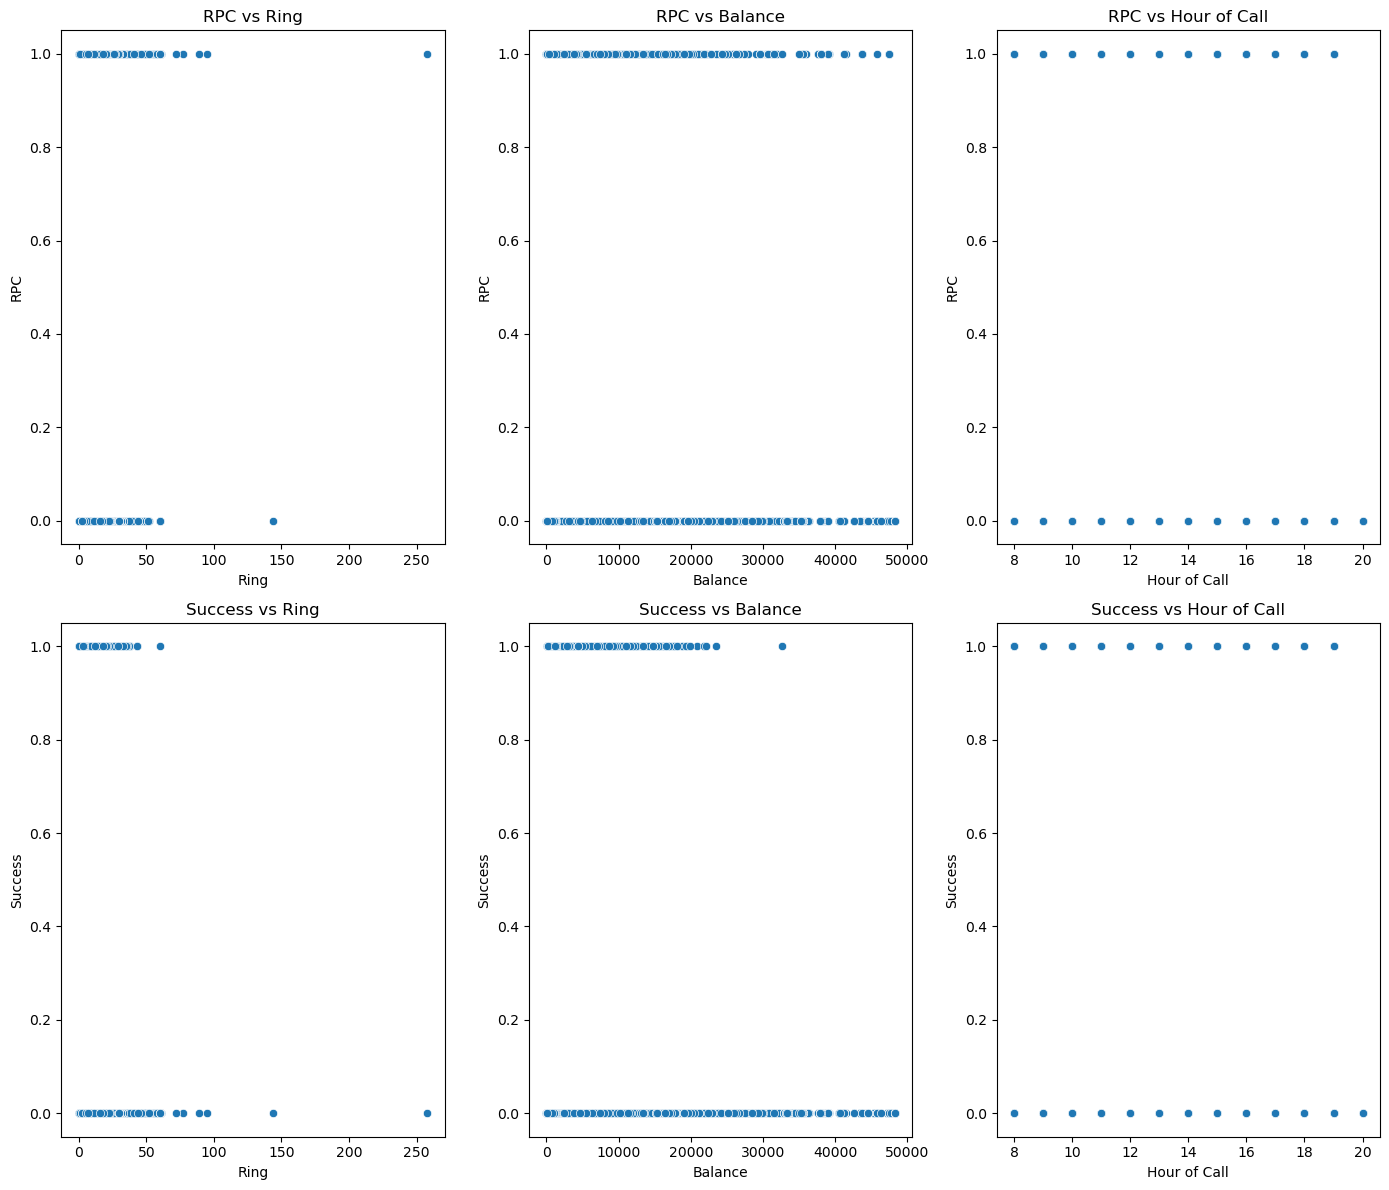

In [13]:
plt.figure(figsize=(14, 12))

# Scatter plots for selected variables
variables = ['Ring', 'Balance', 'Hour of Call']

for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=var, y='RPC', data=df)
    plt.title(f'RPC vs {var}')
    
    plt.subplot(2, 3, i + 4)
    sns.scatterplot(x=var, y='Success', data=df)
    plt.title(f'Success vs {var}')

plt.tight_layout()
plt.show()


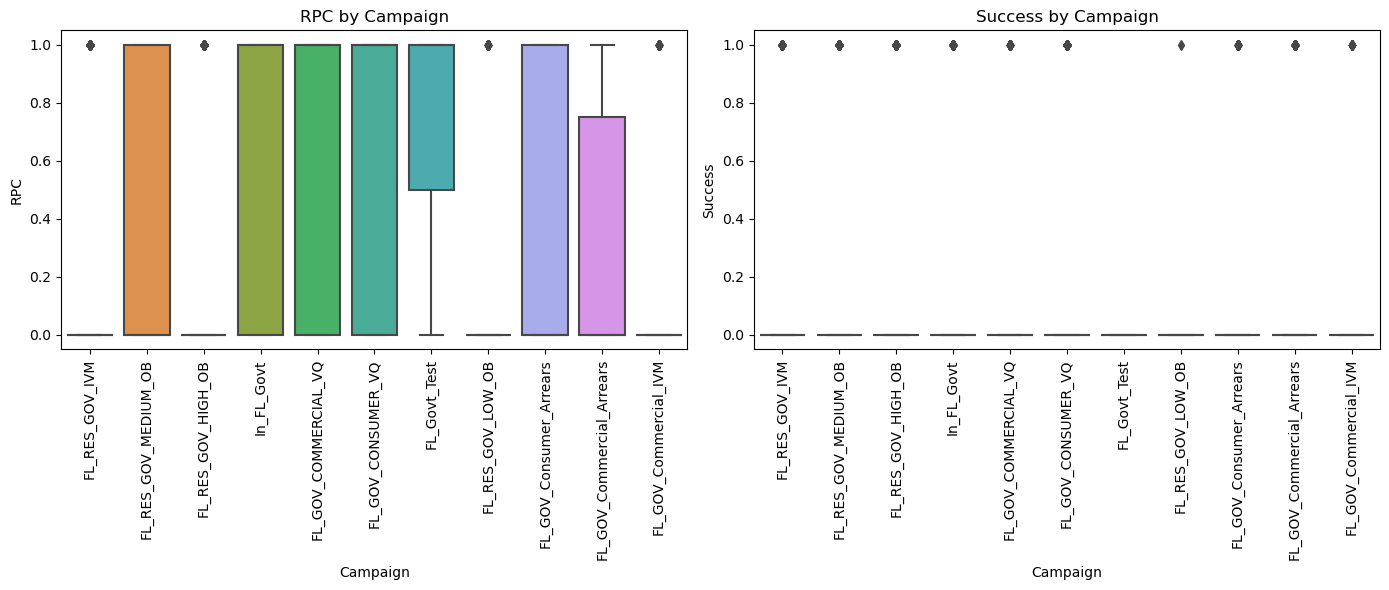

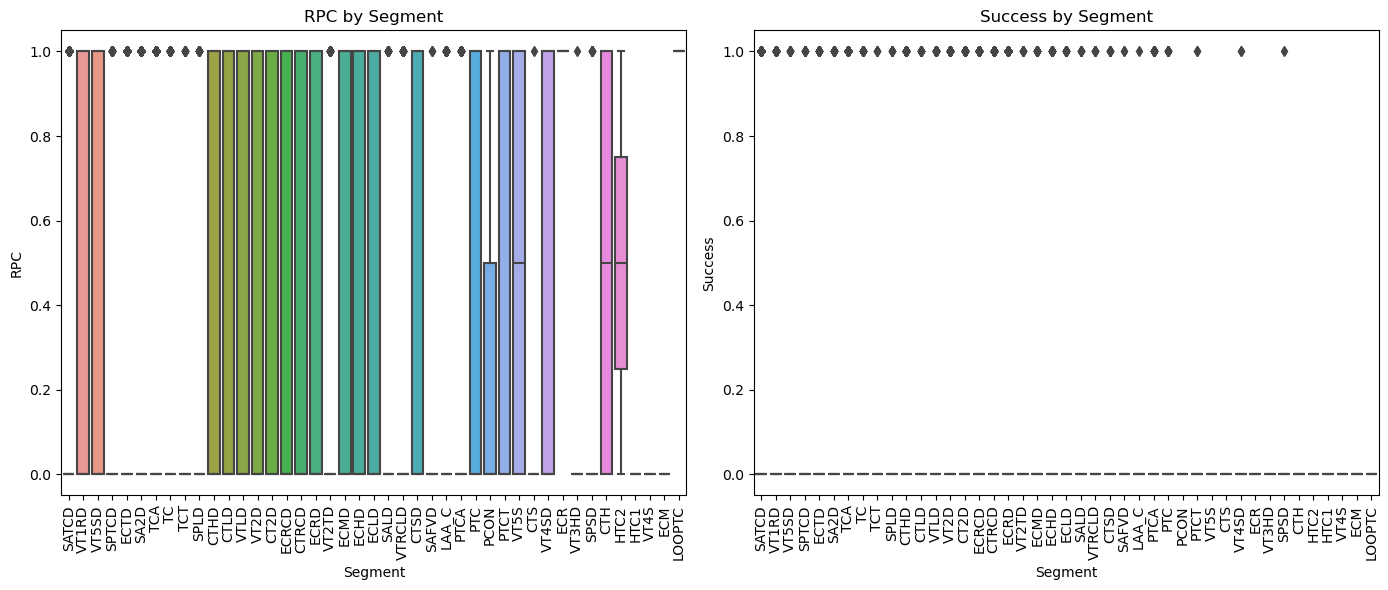

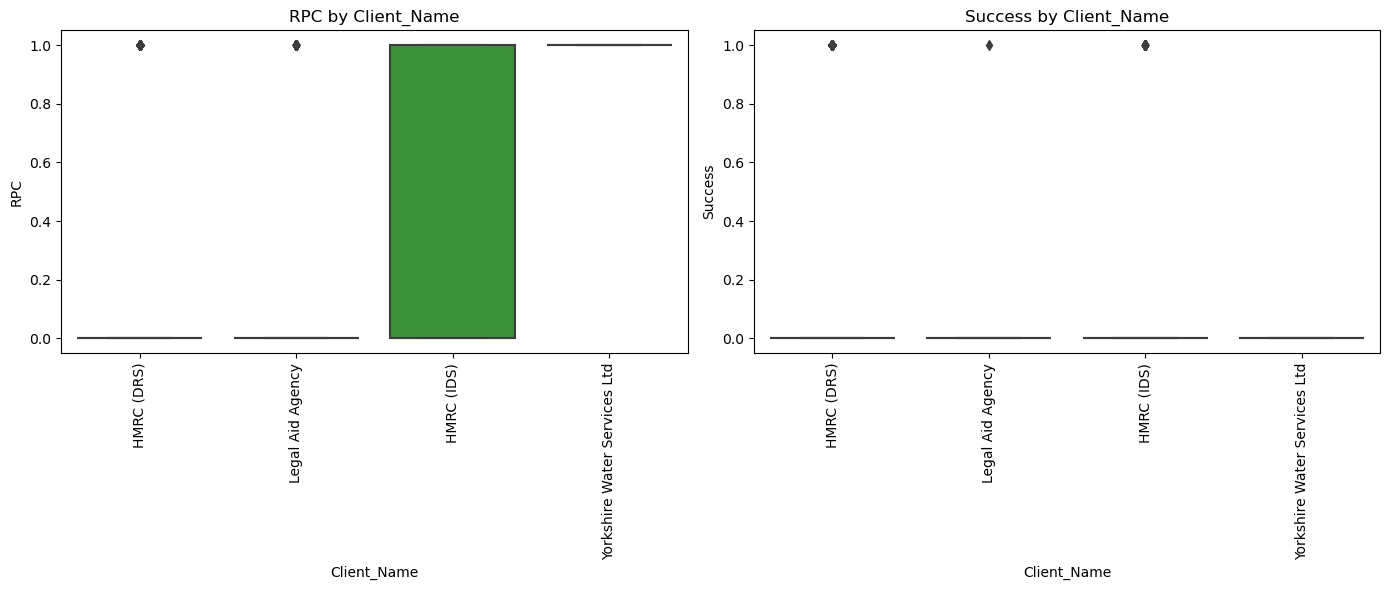

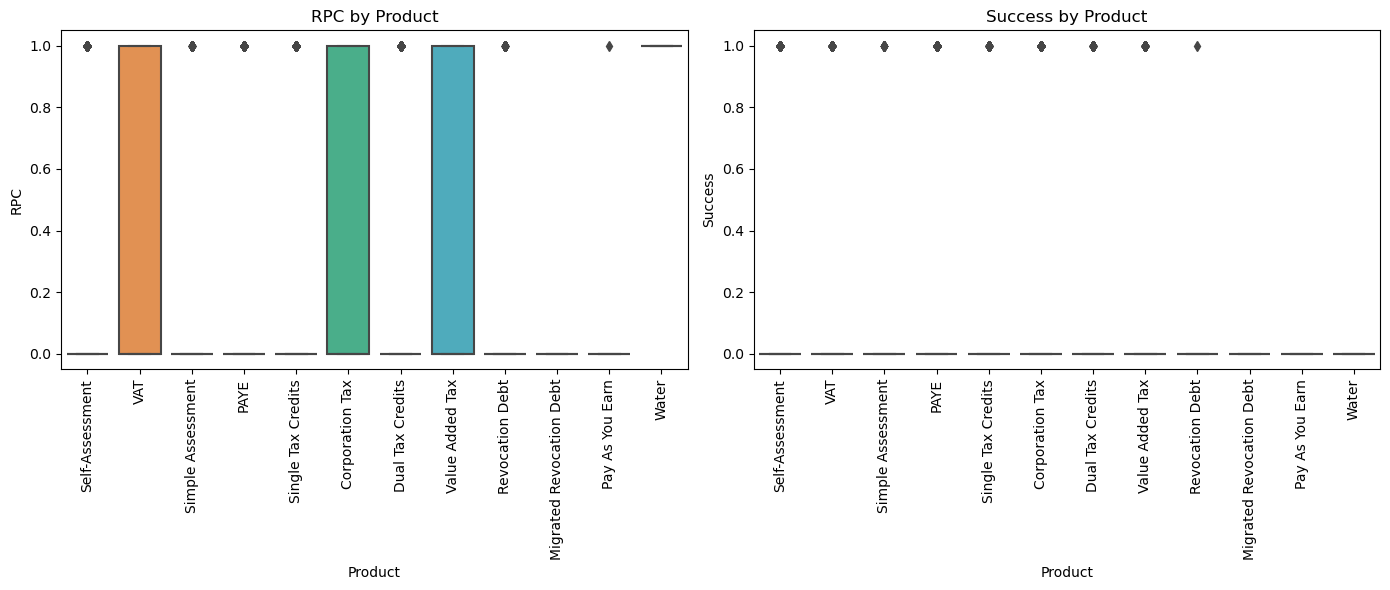

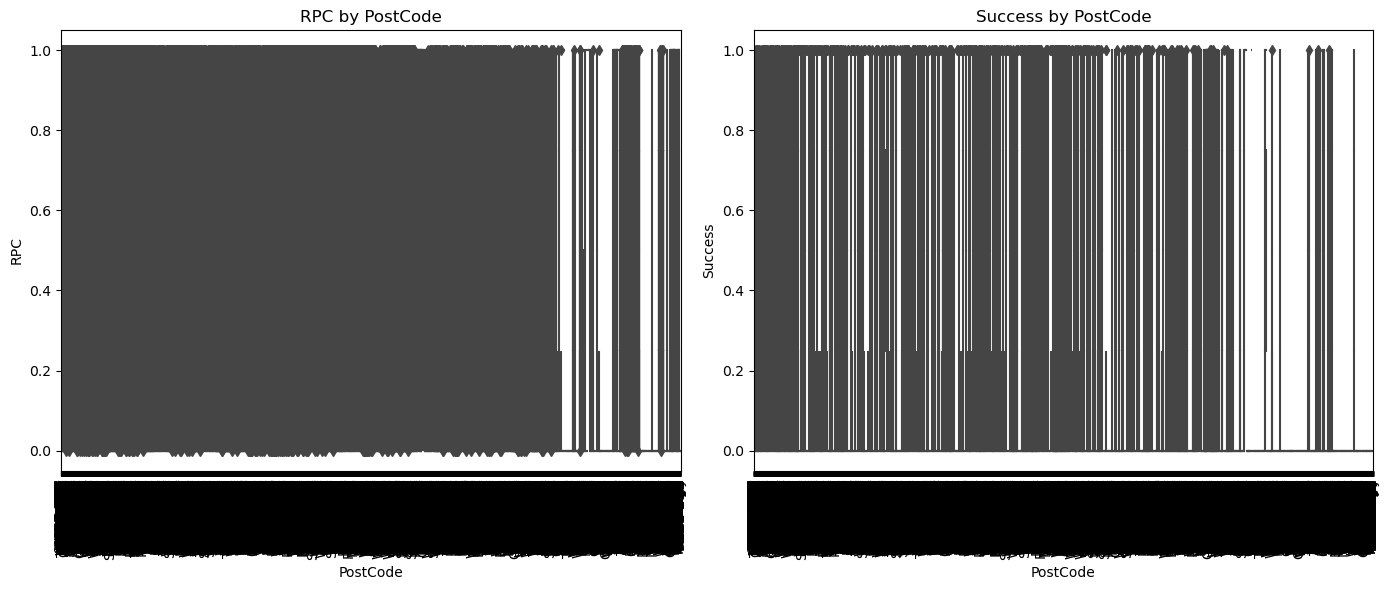

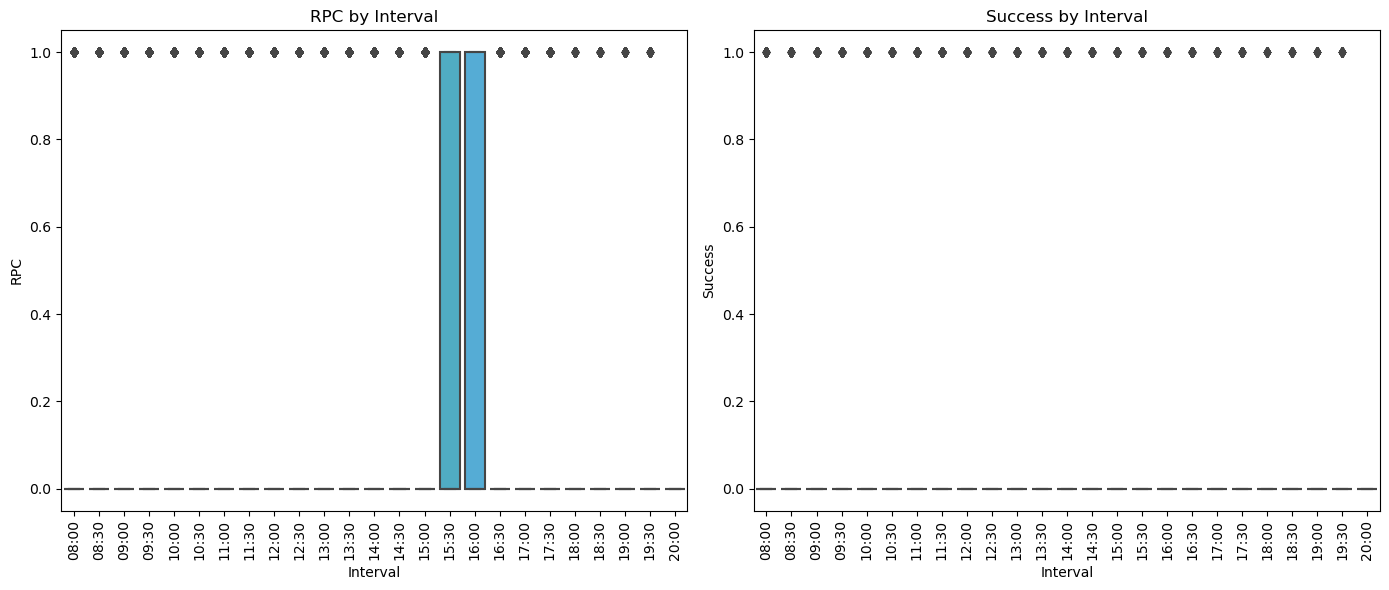

In [14]:
categorical_vars = ['Campaign', 'Segment', 'Client_Name', 'Product', 'PostCode', 'Interval']

for var in categorical_vars:
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=var, y='RPC', data=df)
    plt.xticks(rotation=90)
    plt.title(f'RPC by {var}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=var, y='Success', data=df)
    plt.xticks(rotation=90)
    plt.title(f'Success by {var}')

    plt.tight_layout()
    plt.show()
